In [5]:
import openmc
import openmc.deplete
import numpy as np

In [ ]:
dep_file = 'inf_lat_dep/dep-center/iter3/depletion_results.h5'
mat_file = 'inf_lat_dep/dep-center/iter3/materials.xml'
res = openmc.deplete.Results(dep_file)
dep_t = res.get_times()
stepwise_comps = [res.export_to_materials(i, 
                                          path=mat_file)[0].get_nuclide_densities() 
                  for i in range(len(dep_t))]

In [25]:
#materials
#also doublec heck isotopic compostions conventions in mats
#graphite based on a3-3, triso layers pulled from reported values in
#Neutronics characteristics of a 165 MWth Xe-100 reactor, Mulder et al


#for k-eigenvalue full core, we have 0-6 pass comps

#print(dep_t[([17, 20, 21, 22, 23, 24])])
#pass1 is from 1 to 17, inclusive. pass2 is 18, 19, and 20.  
#pass 3, 4, 5, and 6 are 21, 22, 23, and 24, respectively
temp_comp = {}
for step in stepwise_comps[1:18]:
    for k, v in step.items():
        if k in temp_comp:
            temp_comp[k]['iso'] += v[1]
            temp_comp[k]['count'] += 1
        else:
            temp_comp[k] = {}
            temp_comp[k]['iso'] = v[1]
            temp_comp[k]['count'] = 1

pass1 = {}
for k, v in temp_comp.items():
    pass1[k] = v['iso']/v['count']

temp_comp ={}
for step in stepwise_comps[18:21]:
    for k, v in step.items():
        if k in temp_comp:
            temp_comp[k]['iso'] += v[1]
            temp_comp[k]['count'] += 1
        else:
            temp_comp[k] = {}
            temp_comp[k]['iso'] = v[1]
            temp_comp[k]['count'] = 1      
pass2 = {}
for k, v in temp_comp.items():
    pass2[k] = v['iso']/v['count']

pass3 = {}
for k, v in stepwise_comps[21].items():
    pass3[k] = v[1]

pass4 = {}
for k, v in stepwise_comps[22].items():
    pass4[k] = v[1]

pass5 = {}
for k, v in stepwise_comps[23].items():
    pass5[k] = v[1]

pass6 = {}
for k, v in stepwise_comps[24].items():
    pass6[k] = v[1]

In [26]:
uco0 = openmc.Material(name='UCO_0')
uco0.set_density('g/cm3', 10.4)
uco0.add_nuclide("U235", 0.1386, percent_type='wo')
uco0.add_nuclide("U238",0.7559, percent_type='wo')
uco0.add_element("O", 0.06025, percent_type='wo')
uco0.add_element('C', 0.04523, percent_type='wo')
uco0.add_s_alpha_beta('c_Graphite')
#uco0.depletable = True
uco0.temperature = 1159.15 #K

uco1= openmc.Material(name='UCO_1')
uco1.set_density('g/cm3', 10.4)
uco1.add_components(pass1, percent_type = 'ao')
uco1.add_s_alpha_beta('c_Graphite')
#uco1.depletable = False
uco1.temperature = 1159.15 #K

uco2= openmc.Material(name='UCO_2')
uco2.set_density('g/cm3', 10.4)
uco2.add_components(pass2, percent_type = 'ao')
uco2.add_s_alpha_beta('c_Graphite')
#uco2.depletable = False
uco2.temperature = 1159.15 #K

uco3= openmc.Material(name='UCO_3')
uco3.set_density('g/cm3', 10.4)
uco3.add_components(pass3, percent_type = 'ao')
uco3.add_s_alpha_beta('c_Graphite')
#uco3.depletable = False
uco3.temperature = 1159.15 #K

uco4= openmc.Material(name='UCO_4')
uco4.set_density('g/cm3', 10.4)
uco4.add_components(pass4, percent_type = 'ao')
uco4.add_s_alpha_beta('c_Graphite')
#uco4.depletable = False
uco4.temperature = 1159.15 #K

uco5= openmc.Material(name='UCO_5')
uco5.set_density('g/cm3', 10.4)
uco5.add_components(pass5, percent_type = 'ao')
uco5.add_s_alpha_beta('c_Graphite')
#uco5.depletable = False
uco5.temperature = 1159.15 #K

uco6= openmc.Material(name='UCO_6')
uco6.set_density('g/cm3', 10.4)
uco6.add_components(pass6, percent_type = 'ao')
uco6.add_s_alpha_beta('c_Graphite')
#uco6.depletable = False
uco6.temperature = 1159.15 #K

In [27]:
buffer = openmc.Material(name='buffer')
buffer.set_density('g/cm3', 1.05)
buffer.add_element('C', 1.0, percent_type='ao')
buffer.add_s_alpha_beta('c_Graphite')
buffer.temperature = 1159.15 #K

pyc = openmc.Material(name='PyC')
pyc.set_density('g/cm3', 1.9)
pyc.add_element('C', 1.0, percent_type='ao')
pyc.add_s_alpha_beta('c_Graphite')
pyc.temperature = 1159.15 #K

sic = openmc.Material(name='SiC')
sic.set_density('g/cm3', 3.2)
sic.add_element('C', 0.5, percent_type='ao')
sic.add_element('Si', 0.5, percent_type='ao')
sic.add_s_alpha_beta('c_Graphite')

graphite = openmc.Material(name='graphite')
graphite.set_density('kg/m3', 1700)
graphite.add_element('C', 1.0, percent_type='ao')
graphite.add_s_alpha_beta('c_Graphite')

he = openmc.Material(name='He')
he.set_density('atom/b-cm', 0.0006)
he.add_element('He', 1.0, percent_type='ao')
he.temperature = 778.15 #K

In [28]:
#geometry parameters - remember LAMMPS coords are in meters, this is in cm
#remember, triso order: kernel, buffer, pyc, sic, pyc
peb_or = 3.0 #outer radius of whole pebble
peb_ir = 2.5 # radius of the region that has trisos in it only
triso_r = [0.02125, 0.03125, 0.03525, 0.03875, 0.04275]

#active core params.  bottom of main cone is at (0, 0, 0)
icyl_r = 24
icyl_h = 10
icone_h = 10
icone_t = 24
icone_b = 120
mcyl_r = 120
mcyl_h = 891
mcone_h = 54
mcone_t = 120
mcone_b = 24
ocyl_r = 24
ocyl_h = 134

#reflector params
ref_wall_t = 91

In [29]:
#the triso bounds can stay the same, but the cell and univ definitions need to be unique for every fuel comp

triso_bounds = [openmc.Sphere(r=r) for r in triso_r[:-1]]

triso_cells_0 = [openmc.Cell(fill=uco0, region=-triso_bounds[0]),
               openmc.Cell(fill=buffer,
                           region=+triso_bounds[0] & -triso_bounds[1]),
               openmc.Cell(fill=pyc, 
                           region=+triso_bounds[1] & -triso_bounds[2]),
               openmc.Cell(fill=sic, 
                           region=+triso_bounds[2] & -triso_bounds[3]),
               openmc.Cell(fill=pyc, region=+triso_bounds[3])]
triso_univ_0 = openmc.Universe(cells=triso_cells_0)

triso_cells_1 = [openmc.Cell(fill=uco1, region=-triso_bounds[0]),
               openmc.Cell(fill=buffer,
                           region=+triso_bounds[0] & -triso_bounds[1]),
               openmc.Cell(fill=pyc, 
                           region=+triso_bounds[1] & -triso_bounds[2]),
               openmc.Cell(fill=sic, 
                           region=+triso_bounds[2] & -triso_bounds[3]),
               openmc.Cell(fill=pyc, region=+triso_bounds[3])]
triso_univ_1 = openmc.Universe(cells=triso_cells_1)

triso_cells_2 = [openmc.Cell(fill=uco2, region=-triso_bounds[0]),
               openmc.Cell(fill=buffer,
                           region=+triso_bounds[0] & -triso_bounds[1]),
               openmc.Cell(fill=pyc, 
                           region=+triso_bounds[1] & -triso_bounds[2]),
               openmc.Cell(fill=sic, 
                           region=+triso_bounds[2] & -triso_bounds[3]),
               openmc.Cell(fill=pyc, region=+triso_bounds[3])]
triso_univ_2 = openmc.Universe(cells=triso_cells_2)

triso_cells_3 = [openmc.Cell(fill=uco3, region=-triso_bounds[0]),
               openmc.Cell(fill=buffer,
                           region=+triso_bounds[0] & -triso_bounds[1]),
               openmc.Cell(fill=pyc, 
                           region=+triso_bounds[1] & -triso_bounds[2]),
               openmc.Cell(fill=sic, 
                           region=+triso_bounds[2] & -triso_bounds[3]),
               openmc.Cell(fill=pyc, region=+triso_bounds[3])]
triso_univ_3 = openmc.Universe(cells=triso_cells_3)

triso_cells_4 = [openmc.Cell(fill=uco4, region=-triso_bounds[0]),
               openmc.Cell(fill=buffer,
                           region=+triso_bounds[0] & -triso_bounds[1]),
               openmc.Cell(fill=pyc, 
                           region=+triso_bounds[1] & -triso_bounds[2]),
               openmc.Cell(fill=sic, 
                           region=+triso_bounds[2] & -triso_bounds[3]),
               openmc.Cell(fill=pyc, region=+triso_bounds[3])]
triso_univ_4 = openmc.Universe(cells=triso_cells_4)

triso_cells_5 = [openmc.Cell(fill=uco5, region=-triso_bounds[0]),
               openmc.Cell(fill=buffer,
                           region=+triso_bounds[0] & -triso_bounds[1]),
               openmc.Cell(fill=pyc, 
                           region=+triso_bounds[1] & -triso_bounds[2]),
               openmc.Cell(fill=sic, 
                           region=+triso_bounds[2] & -triso_bounds[3]),
               openmc.Cell(fill=pyc, region=+triso_bounds[3])]
triso_univ_5 = openmc.Universe(cells=triso_cells_5)

triso_cells_6 = [openmc.Cell(fill=uco6, region=-triso_bounds[0]),
               openmc.Cell(fill=buffer,
                           region=+triso_bounds[0] & -triso_bounds[1]),
               openmc.Cell(fill=pyc, 
                           region=+triso_bounds[1] & -triso_bounds[2]),
               openmc.Cell(fill=sic, 
                           region=+triso_bounds[2] & -triso_bounds[3]),
               openmc.Cell(fill=pyc, region=+triso_bounds[3])]
triso_univ_6 = openmc.Universe(cells=triso_cells_6)

In [ ]:
# note to self - you have modified everything above this cell to work with the new comps, everything below hasn't been adjusted yet

In [ ]:
peb_wfuel = openmc.Sphere(r=peb_ir)
peb_wfuel_outer = -peb_wfuel

peb_nofuel = openmc.Sphere(r=peb_or)
peb_nofuel_zone_outer = -peb_nofuel
peb_nofuel_zone_inner = +peb_wfuel
peb_fuel_zone = -peb_wfuel

sphere = openmc.Cell(region=peb_wfuel_outer)
lower_left, upper_right = sphere.region.bounding_box
shape = (5, 5, 5)
pitch = (upper_right - lower_left)/shape
lattice = openmc.model.create_triso_lattice(
    trisos, lower_left, pitch, shape, graphite)

sphere.fill = lattice

pebble_element = [sphere,
              openmc.Cell(fill=graphite, region=peb_nofuel_zone_inner & peb_nofuel_zone_outer)]
pebble_univ = openmc.Universe(cells=pebble_element)
active_core_sides = openmc.ZCylinder(r = core_r)
active_core_top = openmc.ZPlane(z0=(core_h/2))
active_core_bot = openmc.ZPlane(z0=-(core_h/2))
active_core_bound = -active_core_sides & -active_core_top & +active_core_bot

In [10]:

pebs = [openmc.model.TRISO(peb_or, pebble_univ, peb_center) for peb_center in peb_centers]

inner_core = openmc.Cell(region=active_core_bound)
lower_left_core, upper_right_core = inner_core.region.bounding_box
shape_core = (5, 5, 5)
pitch_core = (upper_right_core - lower_left_core)/shape_core
core_lattice = openmc.model.create_triso_lattice(
    pebs, lower_left_core, pitch_core, shape_core, he)

inner_core.fill=core_lattice

starting openmc pack
4.632573526352644
[-4.49997907 -4.49998868 -4.5       ]
[4.49860181 4.49907852 4.5       ]


In [4]:
outer_reflector_sides = openmc.ZCylinder(r = (core_r+reflector_t), boundary_type='vacuum')
outer_reflector_top = openmc.ZPlane(z0=((core_h/2)+reflector_t),boundary_type='vacuum')
outer_reflector_bot = openmc.ZPlane(z0=-((core_h/2)+reflector_t),boundary_type='vacuum')
reflector_outer = -outer_reflector_sides & -outer_reflector_top & +outer_reflector_bot
reflector_bounds = reflector_outer | active_core_bound
reflector = openmc.Cell(region = reflector_bounds, fill = graphite)

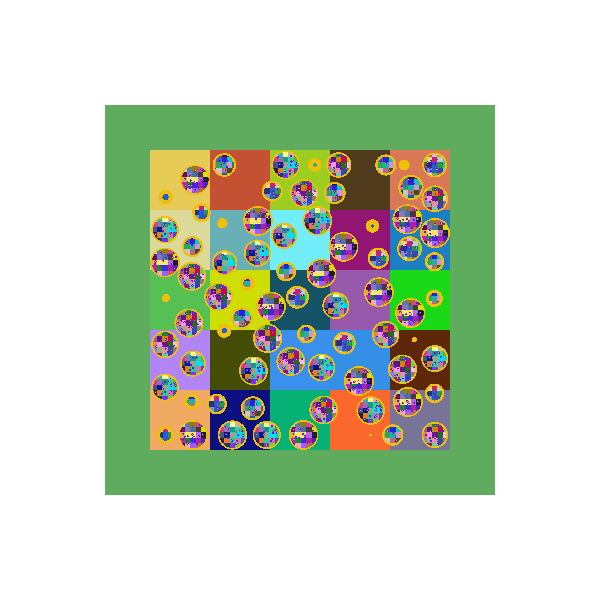

In [5]:
universe = openmc.Universe(cells=[inner_core, reflector])

geometry = openmc.Geometry(universe)
geometry.export_to_xml()

materials = list(geometry.get_all_materials().values())
openmc.Materials(materials).export_to_xml()

settings = openmc.Settings()
settings.run_mode = 'plot'
settings.export_to_xml()

#mc.plot_geometry()
plot = openmc.Plot.from_geometry(geometry)
plot.basis = 'xz'
plot.width = (core_r*4, core_h*2)
plot.pixels = (600, 600)
plot.to_ipython_image()
#mc.plot_inline(plot)

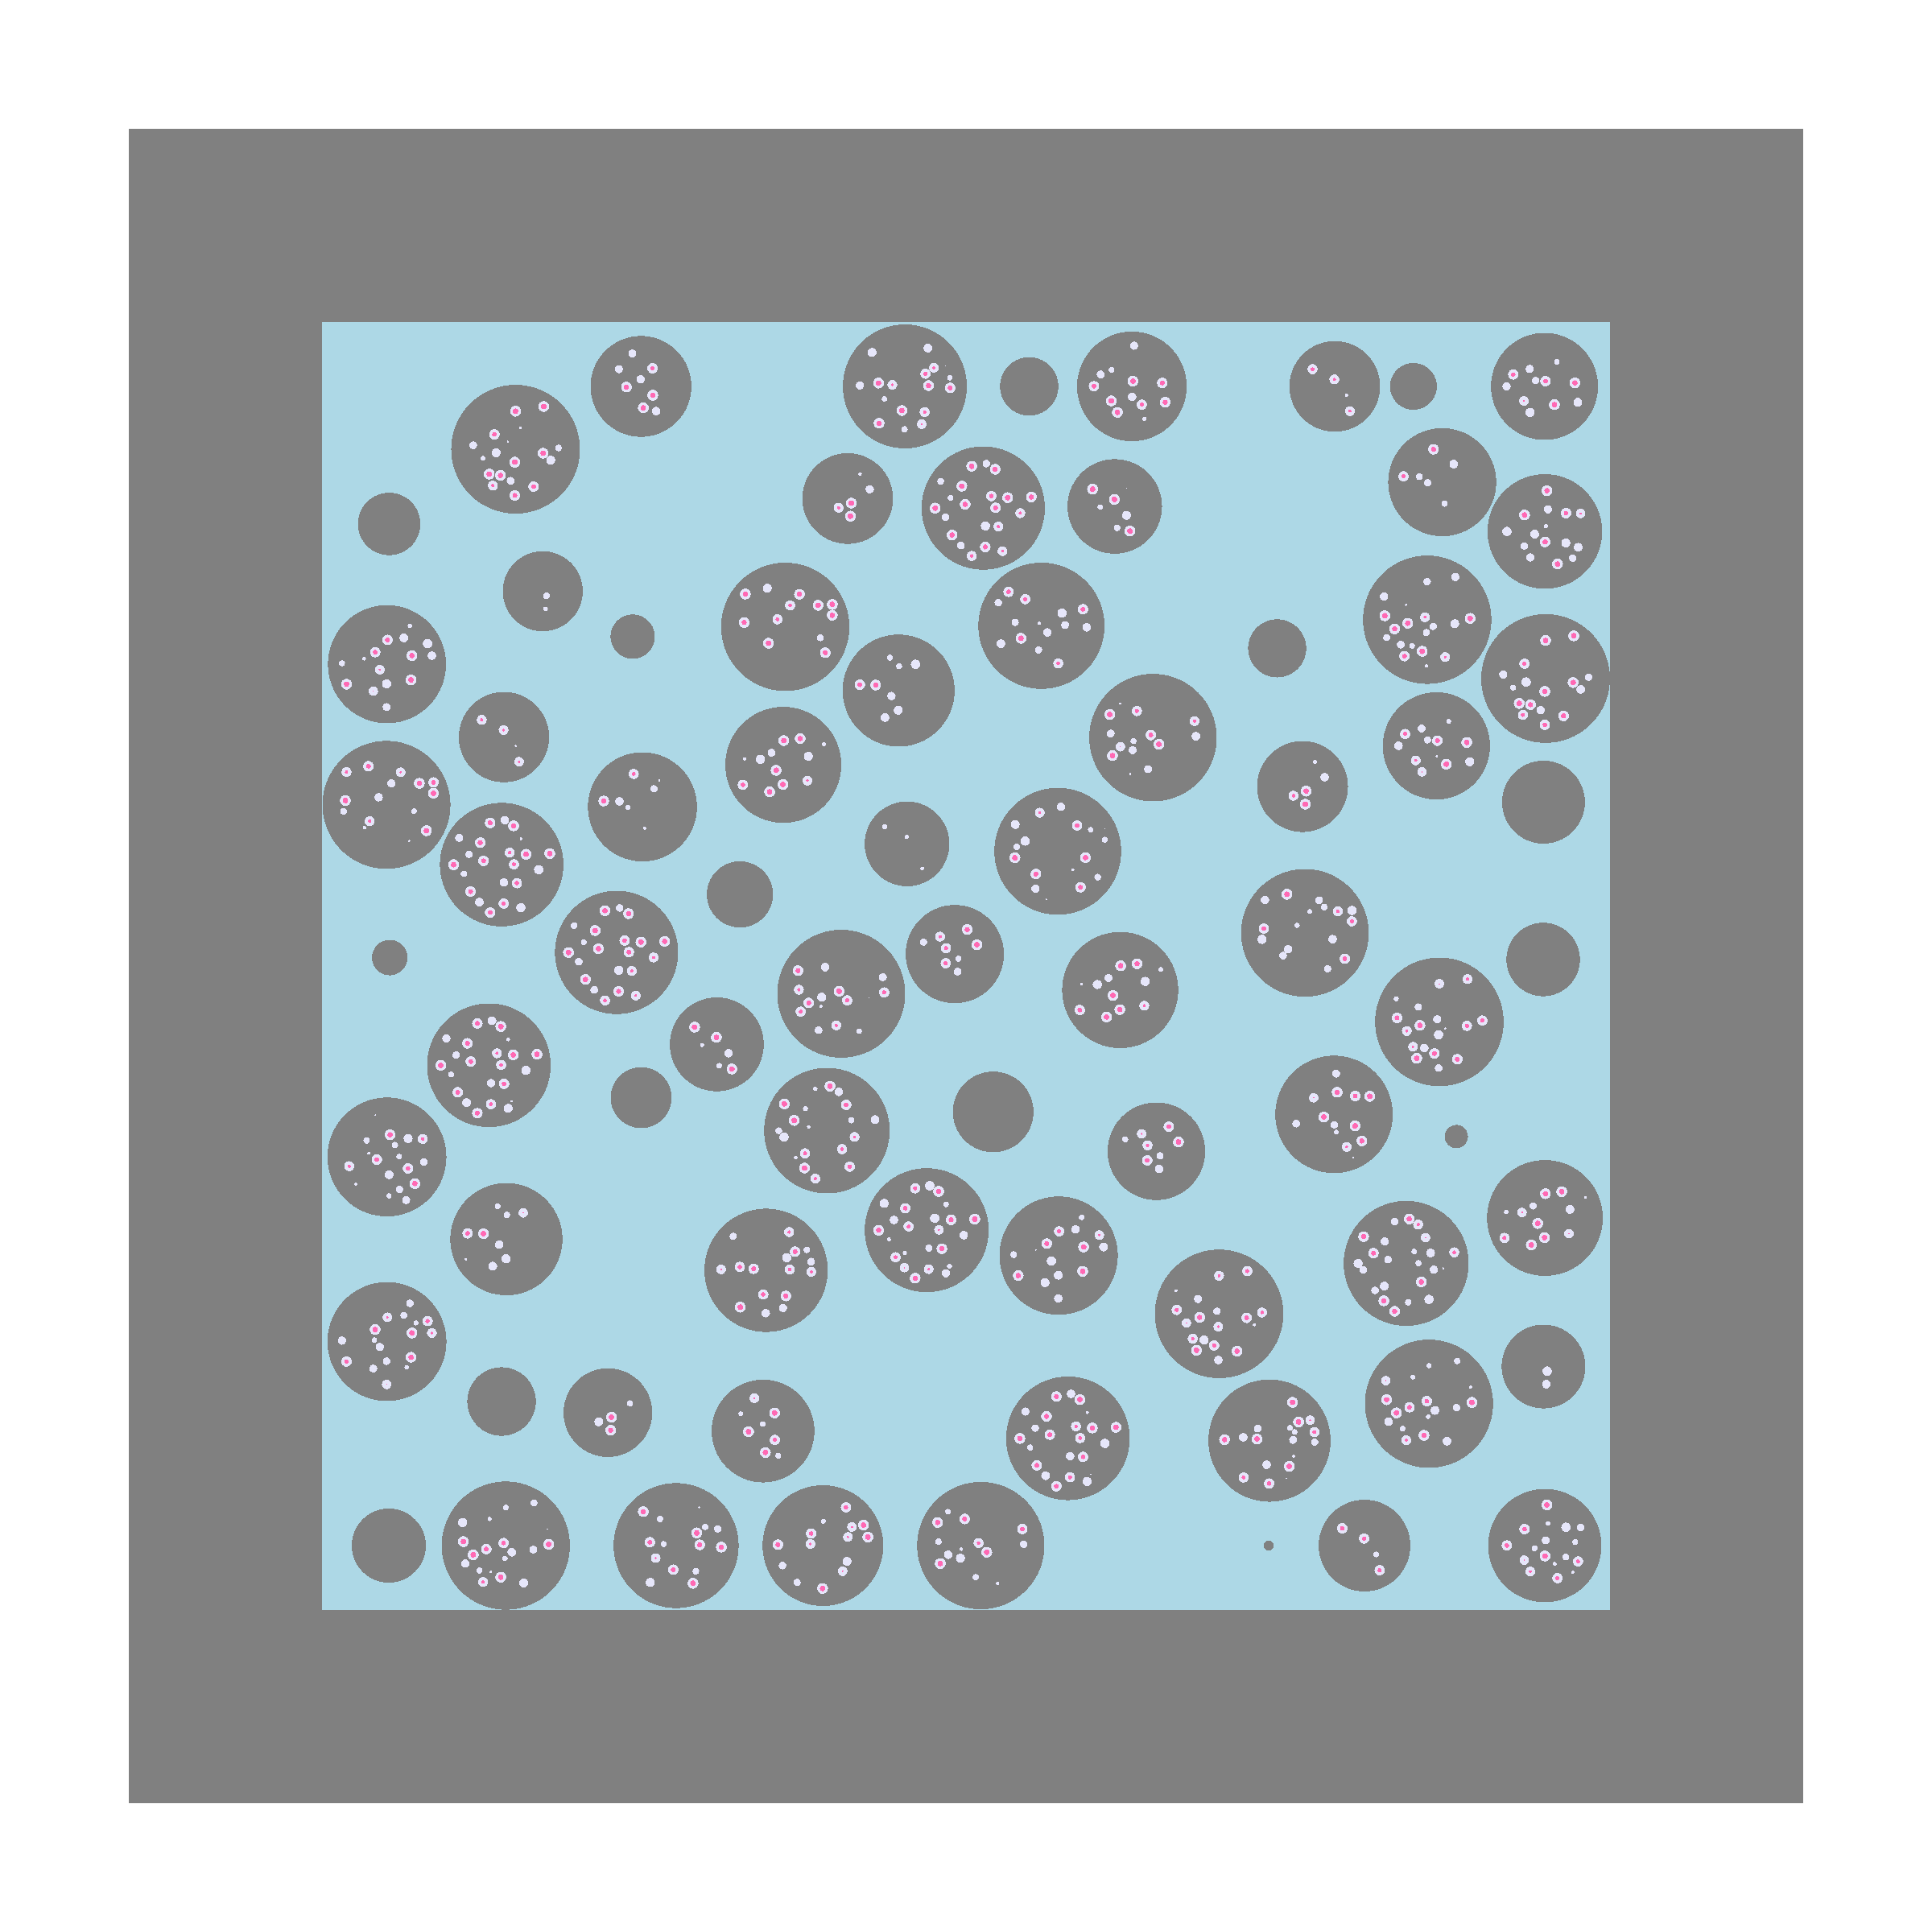

In [6]:
plot.color_by = 'material'
plot.colors = {graphite: 'gray', he: 'lightblue', fuel: 'hotpink', PyC: 'lavender'}
plot.width = (core_r*3, core_h*1.5)
plot.pixels = (2400, 2400)
plot.to_ipython_image()